# **<ins>Factor Analysis</ins>**

## **INTRODUCTION**
Factor analysis is one of the unsupervised machine learning algorithms which is used for dimensionality reduction. This algorithm creates factors from the observed variables to represent the common variance i.e. variance due to correlation among the observed variables. Yes, it sounds a bit technical so let’s break it down into pizza and slices.
<br><img src='https://miro.medium.com/max/293/1*dlZRhuOKXeBMXvpQer8sSA.png' style='width:20%'><br>
Representing features in terms of factors
<br>
x is the variable and F is the factor and l is the factor loading which can also be considered as the weight of the factor for the corresponding variable. The number of factors is equal to the number of variables.
<br><br>

<br><hr><br>

## Installing Factor Analyzer

In [1]:
!pip install factor_analyzer

     |████████████████████████████████| 41 kB 337 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=f12abec50d27545c6c384313deaee5065dddc3de94310a2405d3be32f87b76ce
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


## Import Required Libraries

In [2]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

## Loading Data

In [3]:
df= pd.read_csv("bfi.csv")

In [4]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


## Preprocess Data


In [5]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [6]:
# Dropping unnecessary columns
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

In [7]:
# Dropping missing values rows
df.dropna(inplace=True)

In [8]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


## Adequacy Test

### Bartlett’s test

In [9]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18210.199553924962, 0.0)

### Kaiser-Meyer-Olkin (KMO) Test

In [10]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8482210116350438

## Choosing the Number of Factors


In [11]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df, 25)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.13457985, 2.75337527, 2.14814212, 1.85250623, 1.54846254,
       1.11066151, 0.98067695, 0.82430872, 0.79516217, 0.71828982,
       0.68602566, 0.67614851, 0.65177562, 0.62297416, 0.59623084,
       0.56244599, 0.54329886, 0.51434031, 0.49437154, 0.48263949,
       0.44865495, 0.42280589, 0.40028481, 0.38773757, 0.38183723,
       0.2622634 ])

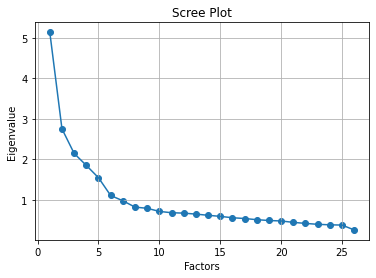

In [12]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## Performing Factor Analysis

In [13]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df, 6)
fa.loadings_

array([[-0.07131035, -0.01751926,  0.05405798],
       [-0.23219058,  0.08334477,  0.03458871],
       [ 0.5413533 ,  0.06211685,  0.04667964],
       [ 0.64586903,  0.04331579,  0.00192803],
       [ 0.3910012 , -0.0592843 ,  0.07552545],
       [ 0.64743433, -0.08504573, -0.01610074],
       [-0.012761  ,  0.08019221,  0.61189812],
       [-0.00668554,  0.14317343,  0.63664786],
       [-0.00354385, -0.00201999,  0.48602329],
       [ 0.05511348,  0.18756638, -0.63069868],
       [-0.05185813,  0.26189667, -0.46496584],
       [-0.53560024,  0.02486523,  0.09320605],
       [-0.57445533,  0.2160911 , -0.01194908],
       [ 0.60693871,  0.09092885,  0.0968013 ],
       [ 0.69550543, -0.10590157, -0.06884823],
       [ 0.4264341 ,  0.09512995,  0.30777364],
       [ 0.00397076,  0.74125647, -0.06354794],
       [-0.02255664,  0.74077166, -0.01052292],
       [ 0.01980717,  0.74281971, -0.04895261],
       [-0.1871232 ,  0.58791351, -0.08352484],
       [-0.0122797 ,  0.50640962, -0.094

In [14]:
# Create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer()
fa.fit(df, 5)
fa.loadings_

array([[-0.07131035, -0.01751926,  0.05405798],
       [-0.23219058,  0.08334477,  0.03458871],
       [ 0.5413533 ,  0.06211685,  0.04667964],
       [ 0.64586903,  0.04331579,  0.00192803],
       [ 0.3910012 , -0.0592843 ,  0.07552545],
       [ 0.64743433, -0.08504573, -0.01610074],
       [-0.012761  ,  0.08019221,  0.61189812],
       [-0.00668554,  0.14317343,  0.63664786],
       [-0.00354385, -0.00201999,  0.48602329],
       [ 0.05511348,  0.18756638, -0.63069868],
       [-0.05185813,  0.26189667, -0.46496584],
       [-0.53560024,  0.02486523,  0.09320605],
       [-0.57445533,  0.2160911 , -0.01194908],
       [ 0.60693871,  0.09092885,  0.0968013 ],
       [ 0.69550543, -0.10590157, -0.06884823],
       [ 0.4264341 ,  0.09512995,  0.30777364],
       [ 0.00397076,  0.74125647, -0.06354794],
       [-0.02255664,  0.74077166, -0.01052292],
       [ 0.01980717,  0.74281971, -0.04895261],
       [-0.1871232 ,  0.58791351, -0.08352484],
       [-0.0122797 ,  0.50640962, -0.094

In [15]:
# Get variance of each factors
fa.get_factor_variance()

(array([3.19120329, 2.58653631, 2.12619304]),
 array([0.12273859, 0.09948217, 0.08177666]),
 array([0.12273859, 0.22222075, 0.30399741]))

## **Conclusion**
Factor Analysis brings in simplicity after reducing variables. Factor Analysis, including Principal Component Analysis, is also often used along with segmentation studies. In this post, we understood about the factor analysis method, and the assumptions made before working on the method. We also saw different kinds of factor analysis, and how they can be performed on different platforms.